In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
import plotly.express as px
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, ElasticNet, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, GradientBoostingRegressor, RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_percentage_error
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping

In [2]:
data = pd.read_csv('deliverytime.txt')

In [3]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30


In [4]:
data.sample(5)

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min)
33434,8194,INDORES01DEL02,33,4.5,22.695207,75.866059,22.775207,75.946059,Meal,scooter,24
7709,8C40,CHENRES11DEL01,29,4.3,13.064181,80.236442,13.074181,80.246442,Buffet,motorcycle,27
39104,19C8,MUMRES04DEL02,29,4.3,19.254567,72.848923,19.274567,72.868923,Drinks,motorcycle,20
23289,CFD0,ALHRES06DEL02,22,4.8,0.000000,0.000000,0.020000,0.020000,Buffet,scooter,12
25111,5E1C,MUMRES15DEL02,31,4.2,19.176269,72.836721,19.256269,72.916721,Buffet,motorcycle,42


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  int64  
 3   Delivery_person_Ratings      45593 non-null  float64
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Type_of_order                45593 non-null  object 
 9   Type_of_vehicle              45593 non-null  object 
 10  Time_taken(min)              45593 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 3.8+ MB


In [6]:
data.isnull().sum()

ID                             0
Delivery_person_ID             0
Delivery_person_Age            0
Delivery_person_Ratings        0
Restaurant_latitude            0
Restaurant_longitude           0
Delivery_location_latitude     0
Delivery_location_longitude    0
Type_of_order                  0
Type_of_vehicle                0
Time_taken(min)                0
dtype: int64

In [7]:
data.describe()

,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Time_taken(min)
count,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000,45593.000000
mean,29.544075,4.632367,17.017729,70.231332,17.465186,70.845702,26.294607
std,5.696793,0.327708,8.185109,22.883647,7.335122,21.118812,9.383806
min,15.000000,1.000000,-30.905562,-88.366217,0.010000,0.010000,10.000000
25%,25.000000,4.600000,12.933284,73.170000,12.988453,73.280000,19.000000
50%,29.000000,4.700000,18.546947,75.898497,18.633934,76.002574,26.000000
75%,34.000000,4.800000,22.728163,78.044095,22.785049,78.107044,32.000000
max,50.000000,6.000000,30.914057,88.433452,31.054057,88.563452,54.000000


In [8]:
data.describe(include = object)

,ID,Delivery_person_ID,Type_of_order,Type_of_vehicle
count,45593,45593,45593,45593
unique,45451,1320,4,4
top,7E+08,PUNERES01DEL01,Snack,motorcycle
freq,3,67,11533,26435


In [9]:
data.Type_of_order.value_counts()

Snack      11533
Meal       11458
Drinks     11322
Buffet     11280
Name: Type_of_order, dtype: int64

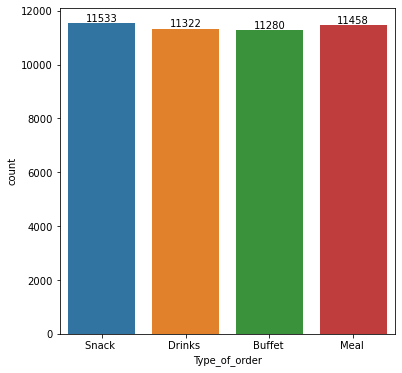

In [10]:
plt.figure(figsize = (6, 6))
ax = sbn.countplot(x = data.Type_of_order)
ax.bar_label(ax.containers[0]);

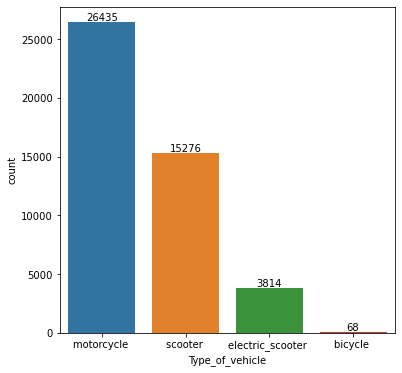

In [11]:
plt.figure(figsize = (6, 6))
bx = sbn.countplot(x = data.Type_of_vehicle)
bx.bar_label(bx.containers[0]);

In [12]:
data.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Type_of_order', 'Type_of_vehicle',
       'Time_taken(min)'],
      dtype='object')

In [ ]:
fig = px.scatter(data_frame = data, y = 'Time_taken(min)', x = 'Delivery_person_Age',
                 size = "Time_taken(min)", trendline = "ols",title = 'time taken according to vehicle', color="Type_of_vehicle")
fig.show()

In [14]:
## Calculate the Distance using longtitude and latitude

In [15]:
def distance(lat1, lat2, lon1, lon2):
    lat1_rad = math.radians(lat1)
    lat2_rad = math.radians(lat2)
    lon1_rad = math.radians(lon1)
    lon2_rad = math.radians(lon2)
    
    distance = math.acos(math.sin(lat1_rad) * math.sin(lat2_rad) + math.cos(lat1_rad) * math.cos(lat2_rad) * math.cos(lon2_rad - lon1_rad)) * 6371
    
    return distance

## math.acos fonksiyonu, radyan cinsinden bir açıyı döndürürken, np.sin ve np.cos fonksiyonları derece cinsinden çalışır

In [16]:
data['Distance'] = np.nan

for i in range(len(data)):
    data.loc[i, 'Distance'] = distance(data.loc[i, 'Restaurant_latitude'], data.loc[i, 'Delivery_location_latitude'],
                                       data.loc[i, 'Restaurant_longitude'], data.loc[i, 'Delivery_location_longitude'])

In [17]:
data.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Type_of_order', 'Type_of_vehicle',
       'Time_taken(min)', 'Distance'],
      dtype='object')

In [18]:
data.head()

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Type_of_order,Type_of_vehicle,Time_taken(min),Distance
0,4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,Snack,motorcycle,24,3.025149
1,B379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,Snack,scooter,33,20.183530
2,5D6D,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,Drinks,motorcycle,26,1.552758
3,7A6A,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,Buffet,motorcycle,21,7.790401
4,70A2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,Snack,scooter,30,6.210138


In [ ]:
fig = px.scatter(data_frame = data, y = 'Time_taken(min)', x = 'Distance',
                 size = "Time_taken(min)", trendline = "ols",title = 'time taken according to distance', color="Type_of_vehicle")
fig.show()

In [ ]:
fig = px.scatter(data_frame = data, y = 'Delivery_person_Age', x = 'Distance',
                 size = "Time_taken(min)", trendline = "ols",title = 'distance and age', color="Time_taken(min)")
fig.show()

In [ ]:
fig = px.scatter(data_frame = data, y = 'Time_taken(min)', x = 'Delivery_person_Ratings',
                 size = "Time_taken(min)", trendline = "ols",title = 'distance and age', color="Delivery_person_Ratings")
fig.show()

In [ ]:
fig = px.scatter(data_frame = data, y = 'Time_taken(min)', x = 'Distance',
                 size = "Time_taken(min)", trendline = "ols",title = 'distance and age', color="Delivery_person_Ratings")
fig.show()

In [23]:
df = data.drop(['ID', 'Delivery_person_ID','Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude'], axis = 1)
df.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Type_of_order',
       'Type_of_vehicle', 'Time_taken(min)', 'Distance'],
      dtype='object')

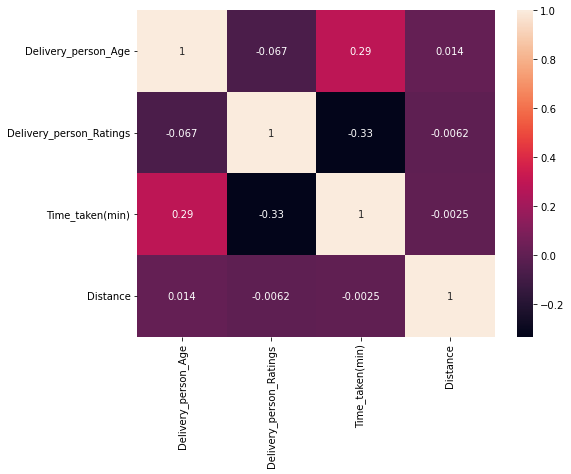

In [24]:
plt.figure(figsize = (8, 6))
sbn.heatmap(df.corr(), annot = True);

In [38]:
df.corr()['Time_taken(min)']

Delivery_person_Age        0.292708
Delivery_person_Ratings   -0.331103
Time_taken(min)            1.000000
Distance                  -0.002508
Name: Time_taken(min), dtype: float64

In [39]:
x = df.drop(['Time_taken(min)', 'Type_of_order'], axis = 1)
y = df['Time_taken(min)']

In [40]:
df.columns

Index(['Delivery_person_Age', 'Delivery_person_Ratings', 'Type_of_order',
       'Type_of_vehicle', 'Time_taken(min)', 'Distance'],
      dtype='object')

In [41]:
x = pd.get_dummies(x, drop_first = True)

In [42]:
x

,Delivery_person_Age,Delivery_person_Ratings,Distance,Type_of_vehicle_electric_scooter,Type_of_vehicle_motorcycle,Type_of_vehicle_scooter
0,37,4.9,3.025149,0,1,0
1,34,4.5,20.183530,0,0,1
2,23,4.4,1.552758,0,1,0
3,38,4.7,7.790401,0,1,0
4,32,4.6,6.210138,0,0,1
...,...,...,...,...,...,...
45588,30,4.8,1.489846,0,1,0
45589,21,4.6,11.007735,0,1,0
45590,30,4.9,4.657195,0,0,1
45591,20,4.7,6.232393,0,1,0


In [43]:
y

0        24
1        33
2        26
3        21
4        30
         ..
45588    32
45589    36
45590    16
45591    26
45592    36
Name: Time_taken(min), Length: 45593, dtype: int64

In [46]:
def regression(x, y):
    lr = LinearRegression()
    e = ElasticNet()
    l = Lasso()
    r = Ridge()
    dt = DecisionTreeRegressor()
    ab = AdaBoostRegressor()
    gb = GradientBoostingRegressor()
    rf = RandomForestRegressor(criterion = "squared_error")  ## {"squared_error", "absolute_error", "friedman_mse", "poisson"}
    sv = SVR(kernel = 'linear')  ## {'linear', 'poly', 'rbf', 'sigmoid'}
    
    models = [lr, e, l, r, dt, ab, gb, rf, sv]
    model_names = ['LinearRegression', 'ElasticNet', 'Lasso', 'Ridge', 'DecisionTree', 'AdaBoost', 'GradientBoost',
                  'RandomForest', 'SupportVector']
    r2 = []
    mse = []
    meap = []
    
    x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.2, random_state = 42)
    x_train = MinMaxScaler().fit_transform(x_train)
    x_test = MinMaxScaler().fit_transform(x_test)
    
    score = pd.DataFrame(columns = ['R2_Score', 'MeanSquared', 'MeanAbsolute'], index = model_names)
    
    for model in models:
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        r2.append(r2_score(y_true, y_pred) * 100)
        mse.append(mean_squared_error(y_true, y_pred) ** 0.5)
        meap.append(mean_absolute_percentage_error(y_true, y_pred))
    
    score['R2_Score'] = r2
    score['MeanSquared'] = mse
    score['MeanAbsolute'] = meap
    
    return score.sort_values('R2_Score', ascending = False)

In [47]:
regression(x, y)

,R2_Score,MeanSquared,MeanAbsolute
GradientBoost,40.556750,7.219331,0.251803
AdaBoost,36.059604,7.487439,0.275922
RandomForest,24.813250,8.119257,0.277743
Ridge,20.307153,8.359019,0.294063
LinearRegression,20.304155,8.359177,0.293987
SupportVector,19.227031,8.415476,0.282347
ElasticNet,0.622405,9.334475,0.343430
Lasso,-0.001399,9.363726,0.344473
DecisionTree,-11.668389,9.894886,0.329215


In [52]:
##Pycaret'a gorede en iyi sonucu GradientBoost verdi % 40.55 başarı

![Pycaret](pycaret.png)


In [51]:
# df.to_csv('pycaret.csv', index = False)

In [77]:
x_train, x_test, y_train, y_true = train_test_split(x, y, test_size = 0.3, random_state = 42)
x_train = MinMaxScaler().fit_transform(x_train)
x_test = MinMaxScaler().fit_transform(x_test)

In [85]:
model = Sequential()
model.add(Dense(units = 124, activation = 'relu'))
#model.add(Dropout(0.4))
model.add(Dense(units = 256, activation = 'relu'))
#model.add(Dropout(0.4))
model.add(Dense(units = 512, activation = 'relu'))
#model.add(Dropout(0.4))
model.add(Dense(units = 124, activation = 'relu'))
#model.add(Dropout(0.4))
model.add(Dense(units = 30, activation = 'relu'))
model.add(Dense(units = 1, activation = 'linear'))

model.compile(loss = 'mse', metrics = 'MeanSquaredError', optimizer = 'adam')

In [86]:
early_stopping = EarlyStopping(monitor = "val_loss", mode = "min", verbose = 1, patience = 25)

In [87]:
history = model.fit(x_train, y_train, epochs = 200, validation_data = (x_test, y_true), callbacks = [early_stopping], verbose = 1)

Epoch 1/200
998/998 [==============================] - 3s 2ms/step - loss: 84.3866 - mean_squared_error: 84.3866 - val_loss: 69.9607 - val_mean_squared_error: 69.9607
Epoch 2/200
998/998 [==============================] - 2s 2ms/step - loss: 71.0444 - mean_squared_error: 71.0444 - val_loss: 70.1678 - val_mean_squared_error: 70.1678
Epoch 3/200
998/998 [==============================] - 2s 2ms/step - loss: 69.4174 - mean_squared_error: 69.4174 - val_loss: 66.8968 - val_mean_squared_error: 66.8968
Epoch 4/200
998/998 [==============================] - 2s 2ms/step - loss: 67.9392 - mean_squared_error: 67.9392 - val_loss: 69.0991 - val_mean_squared_error: 69.0991
Epoch 5/200
998/998 [==============================] - 2s 2ms/step - loss: 67.5701 - mean_squared_error: 67.5701 - val_loss: 66.0088 - val_mean_squared_error: 66.0088
Epoch 6/200
998/998 [==============================] - 2s 2ms/step - loss: 67.0467 - mean_squared_error: 67.0467 - val_loss: 70.4647 - val_mean_squared_error: 70.464

Epoch 50/200
998/998 [==============================] - 2s 2ms/step - loss: 57.2085 - mean_squared_error: 57.2085 - val_loss: 58.7583 - val_mean_squared_error: 58.7583
Epoch 51/200
998/998 [==============================] - 2s 2ms/step - loss: 56.8387 - mean_squared_error: 56.8387 - val_loss: 56.4730 - val_mean_squared_error: 56.4730
Epoch 52/200
998/998 [==============================] - 2s 2ms/step - loss: 57.0425 - mean_squared_error: 57.0425 - val_loss: 57.0410 - val_mean_squared_error: 57.0410
Epoch 53/200
998/998 [==============================] - 2s 2ms/step - loss: 57.2730 - mean_squared_error: 57.2730 - val_loss: 62.4007 - val_mean_squared_error: 62.4007
Epoch 54/200
998/998 [==============================] - 2s 2ms/step - loss: 56.5909 - mean_squared_error: 56.5909 - val_loss: 56.2988 - val_mean_squared_error: 56.2988
Epoch 55/200
998/998 [==============================] - 2s 2ms/step - loss: 56.7784 - mean_squared_error: 56.7784 - val_loss: 56.4561 - val_mean_squared_error: 

Epoch 99/200
998/998 [==============================] - 2s 2ms/step - loss: 55.6399 - mean_squared_error: 55.6399 - val_loss: 57.2922 - val_mean_squared_error: 57.2922
Epoch 100/200
998/998 [==============================] - 2s 2ms/step - loss: 55.2485 - mean_squared_error: 55.2485 - val_loss: 56.0952 - val_mean_squared_error: 56.0952
Epoch 101/200
998/998 [==============================] - 2s 2ms/step - loss: 55.4461 - mean_squared_error: 55.4461 - val_loss: 55.3511 - val_mean_squared_error: 55.3511
Epoch 102/200
998/998 [==============================] - 2s 2ms/step - loss: 55.2077 - mean_squared_error: 55.2077 - val_loss: 56.5613 - val_mean_squared_error: 56.5613
Epoch 103/200
998/998 [==============================] - 2s 2ms/step - loss: 55.3071 - mean_squared_error: 55.3071 - val_loss: 54.9287 - val_mean_squared_error: 54.9287
Epoch 104/200
998/998 [==============================] - 2s 2ms/step - loss: 55.4995 - mean_squared_error: 55.4995 - val_loss: 56.0601 - val_mean_squared_er

In [88]:
tahmin = model.predict(x_test)

428/428 [==============================] - 0s 869us/step


In [89]:
tahmin

array([[34.74929 ],
       [35.44293 ],
       [37.298687],
       ...,
       [22.891672],
       [25.366674],
       [21.478722]], dtype=float32)

In [90]:
r2_score(y_true, tahmin)

0.35133374751664315

<AxesSubplot:>

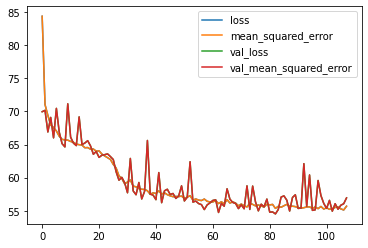

In [91]:
loss = pd.DataFrame(history.history)
loss.plot()

In [123]:
## LSTM
model2 = Sequential()
model2.add(LSTM(units=124, return_sequences = True, input_shape=(x_train.shape[1], 1)))
model2.add(LSTM(units=256, return_sequences = False))
model2.add(Dense(units=512, activation='relu'))
model2.add(Dense(units=124, activation='relu'))
model2.add(Dense(units=30, activation='relu'))
model2.add(Dense(units=1, activation='linear'))

model2.compile(loss='mse', metrics=['MeanSquaredError'], optimizer='adam')


In [124]:
model2.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 6, 124)            62496     
                                                                 
 lstm_9 (LSTM)               (None, 256)               390144    
                                                                 
 dense_73 (Dense)            (None, 512)               131584    
                                                                 
 dense_74 (Dense)            (None, 124)               63612     
                                                                 
 dense_75 (Dense)            (None, 30)                3750      
                                                                 
 dense_76 (Dense)            (None, 1)                 31        
                                                                 
Total params: 651,617
Trainable params: 651,617
Non-t

In [125]:
history2 = model2.fit(x_train, y_train, epochs = 5, validation_data = (x_test, y_true), verbose = 1)

Epoch 1/5
998/998 [==============================] - 47s 43ms/step - loss: 97.3363 - mean_squared_error: 97.3363 - val_loss: 87.1795 - val_mean_squared_error: 87.1795
Epoch 2/5
998/998 [==============================] - 38s 38ms/step - loss: 86.9377 - mean_squared_error: 86.9377 - val_loss: 86.3726 - val_mean_squared_error: 86.3726
Epoch 3/5
998/998 [==============================] - 39s 39ms/step - loss: 86.3197 - mean_squared_error: 86.3197 - val_loss: 82.8439 - val_mean_squared_error: 82.8439
Epoch 4/5
998/998 [==============================] - 40s 40ms/step - loss: 82.9782 - mean_squared_error: 82.9782 - val_loss: 79.6451 - val_mean_squared_error: 79.6451
Epoch 5/5
998/998 [==============================] - 39s 40ms/step - loss: 75.6468 - mean_squared_error: 75.6468 - val_loss: 72.0371 - val_mean_squared_error: 72.0371


In [126]:
tahmin2 = model2.predict(x_test)

428/428 [==============================] - 7s 13ms/step


In [127]:
r2_score(y_true, tahmin2) * 100

17.923404266693176

<AxesSubplot:>

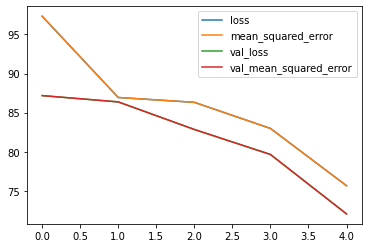

In [128]:
loss2 = pd.DataFrame(history2.history)
loss2.plot()